In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
sns.set_palette("colorblind")

In [ ]:
Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use seaborn's load_dataset function to load the iris database to answer the following questions:


In [2]:
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


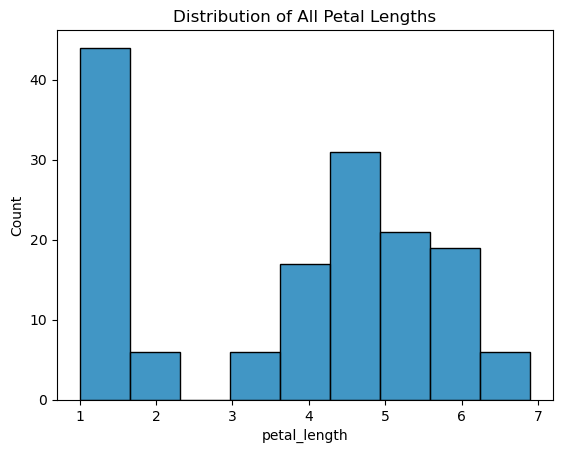

In [3]:
# 1.What does the distribution of petal lengths look like?

plt.title("Distribution of All Petal Lengths")
sns.histplot(x="petal_length", data=iris)
plt.show()

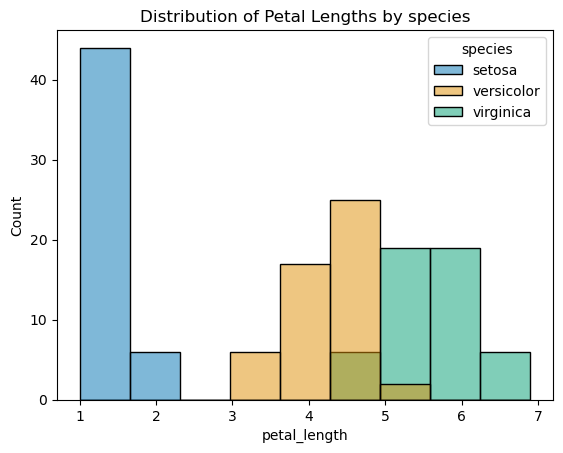

In [4]:
plt.title("Distribution of Petal Lengths by species")
sns.histplot(x="petal_length", hue="species", data=iris)
plt.show()

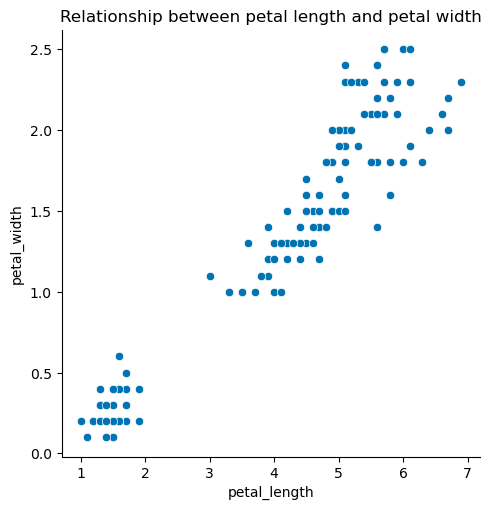

In [5]:
# 2.Is there a relationship between petal length and petal width?
sns.relplot(x="petal_length", y="petal_width", data=iris)
plt.title("Relationship between petal length and petal width")
plt.show()

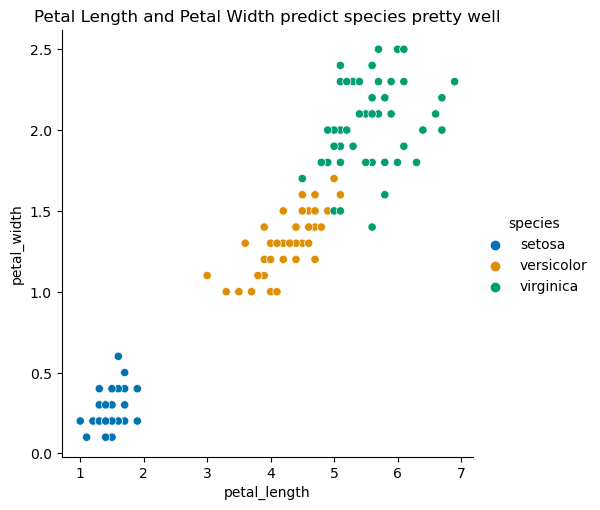

In [6]:
# 3.Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

sns.relplot(x="petal_length", y="petal_width", data=iris, hue="species")
plt.title("Petal Length and Petal Width predict species pretty well")
plt.show()

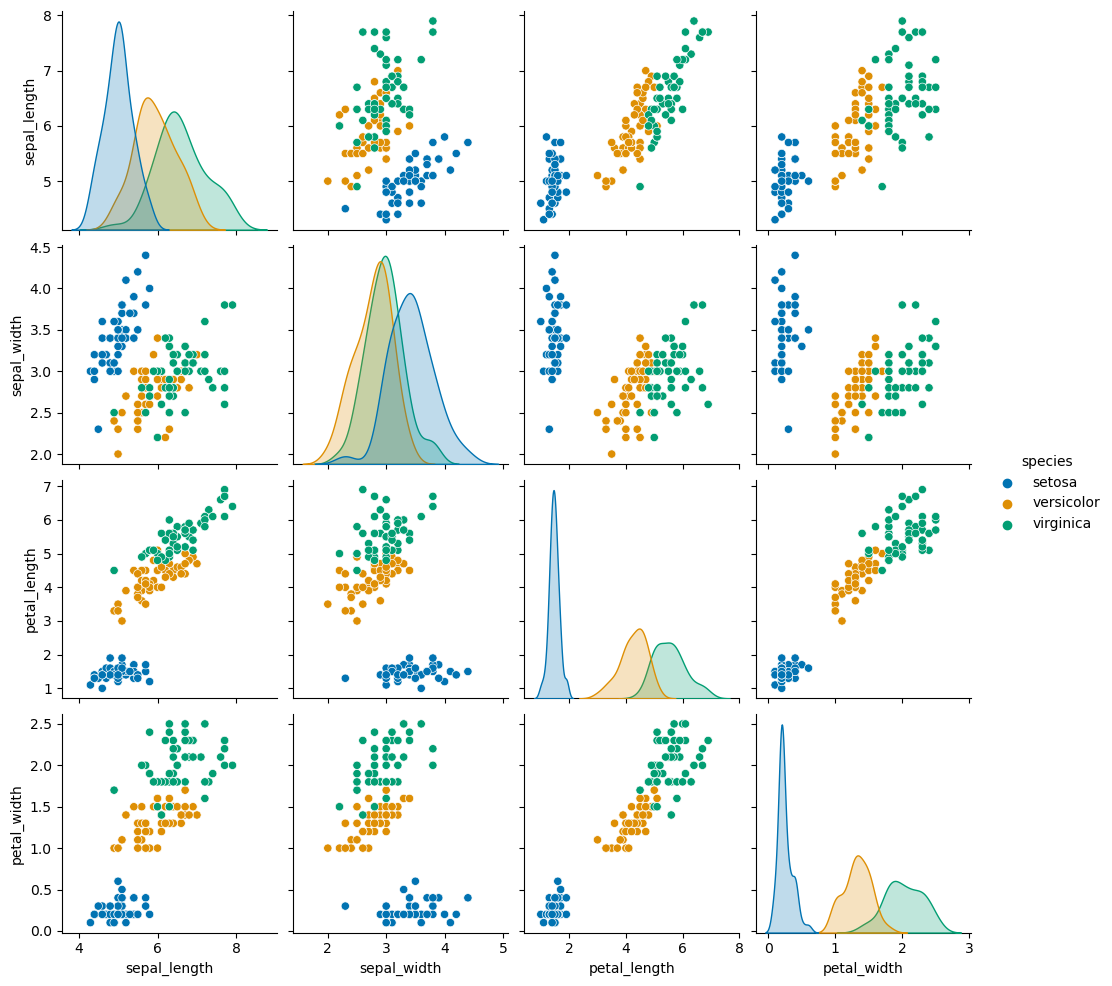

In [7]:
# 4.Which features would be best used to predict species?
sns.pairplot(iris, hue="species")
plt.show()

In [ ]:
# 1.Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?


In [8]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
anscombe.groupby("dataset").agg(["min", "median", "mean", "std", "max"])


x                                 y                             \
         min median mean       std   max   min median      mean       std   
dataset                                                                     
I        4.0    9.0  9.0  3.316625  14.0  4.26   7.58  7.500909  2.031568   
II       4.0    9.0  9.0  3.316625  14.0  3.10   8.14  7.500909  2.031657   
III      4.0    9.0  9.0  3.316625  14.0  5.39   7.11  7.500000  2.030424   
IV       8.0    8.0  9.0  3.316625  19.0  5.25   7.04  7.500909  2.030579   

                
           max  
dataset         
I        10.84  
II        9.26  
III      12.74  
IV       12.50

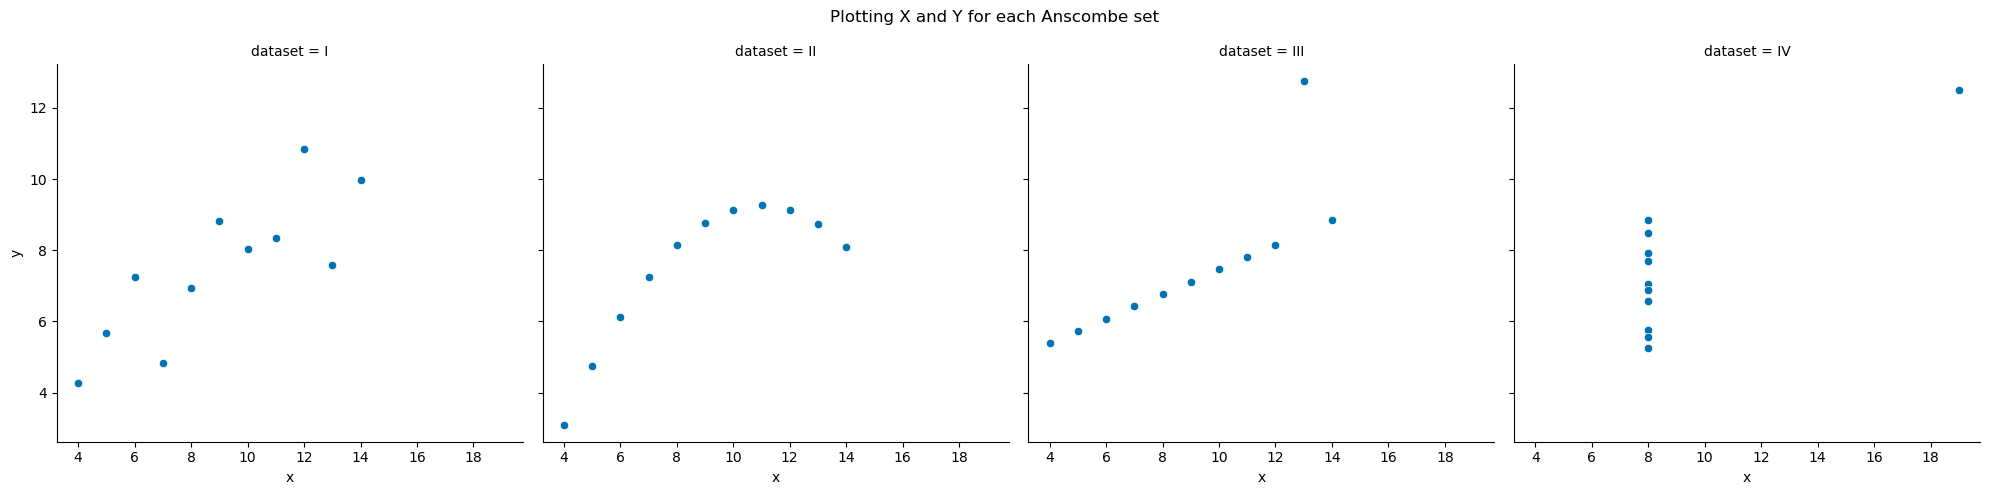

In [10]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x="x", y="y", data=anscombe, col="dataset")
plt.suptitle("Plotting X and Y for each Anscombe set")
plt.tight_layout()
plt.show()

In [11]:
# 2.Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
sprays = data("InsectSprays", show_doc=True)


InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [12]:
sprays = data("InsectSprays")
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


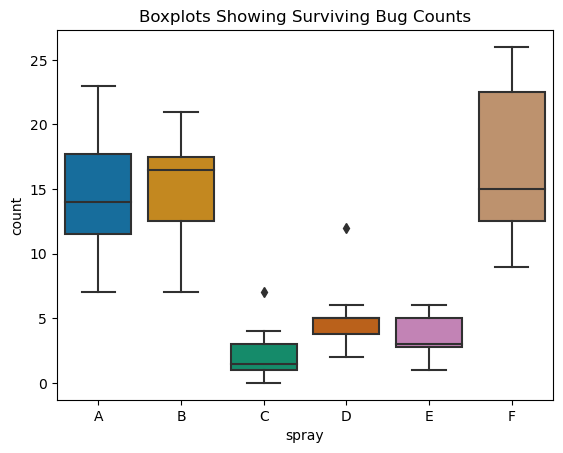

In [13]:
plt.title("Boxplots Showing Surviving Bug Counts")
sns.boxplot(data=sprays, x="spray", y="count")
plt.show()

In [ ]:
# 3.Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:


In [14]:
swiss = data("swiss")
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


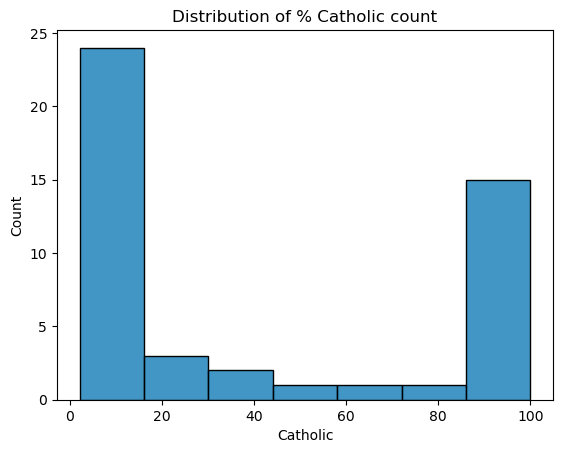

In [15]:
sns.histplot(swiss.Catholic)
plt.title("Distribution of % Catholic count")
plt.show()

In [17]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss["is_catholic"] = swiss.Catholic > 50


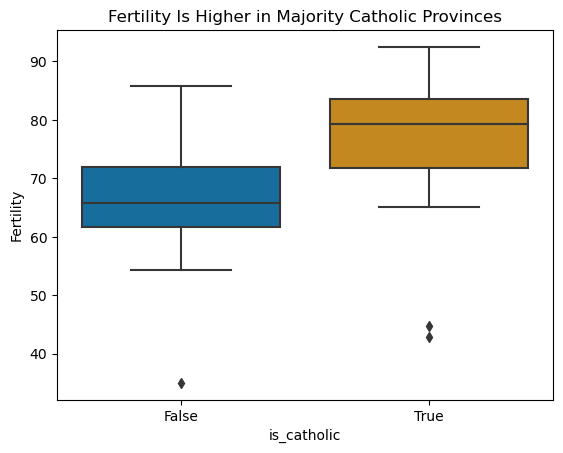

In [18]:
# Does whether or not a province is Catholic influence fertility?
sns.boxplot(data=swiss, x="is_catholic", y="Fertility")
plt.title("Fertility Is Higher in Majority Catholic Provinces")
plt.show()

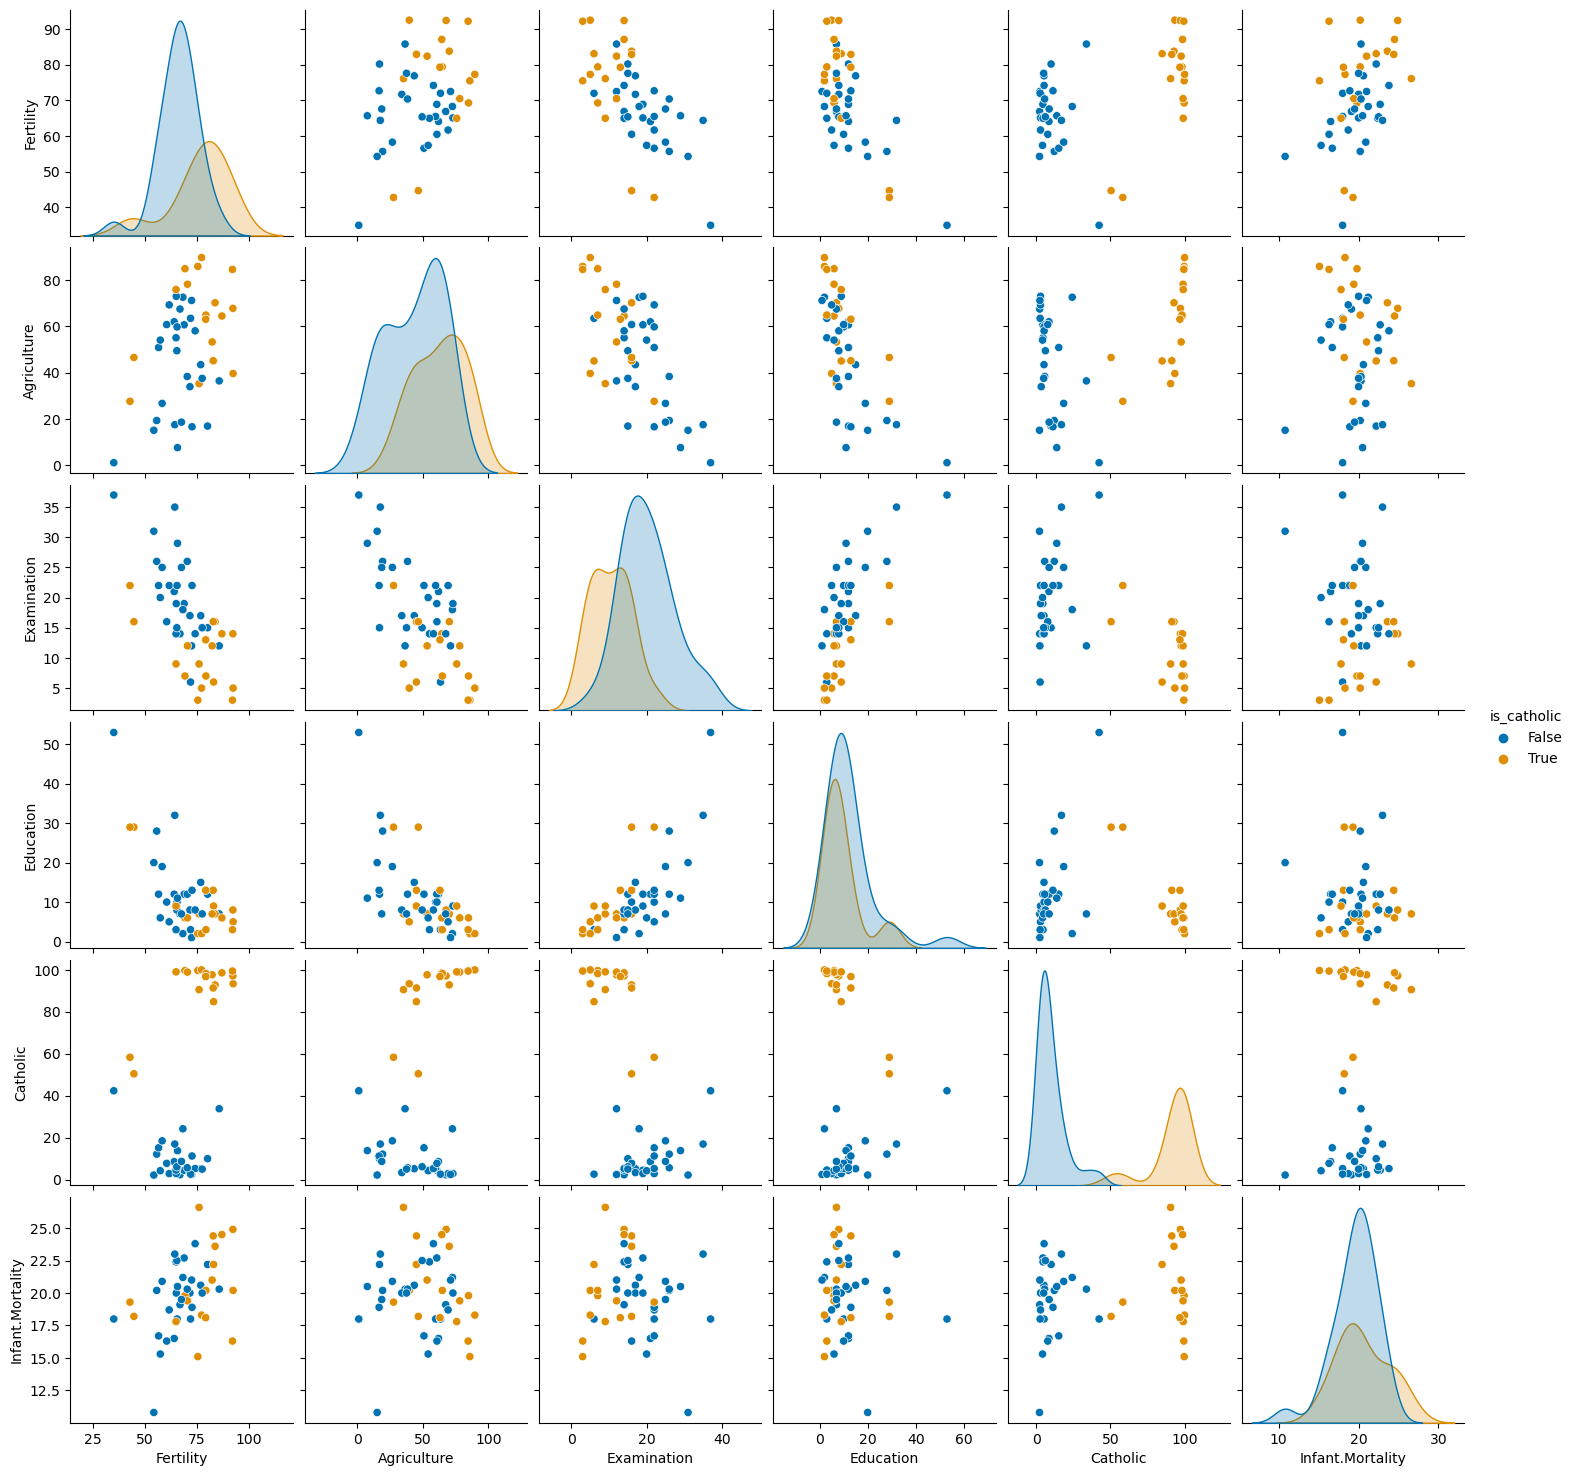

In [19]:
# What measure correlates most strongly with fertility?
sns.pairplot(swiss, hue="is_catholic")

In [20]:
# Check the numbers!
swiss.corr().Fertility


Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

In [23]:
# 4.Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.
def get_db_url(db):
    from env import user, password, hostname
    return f'mysql+pymysql://{user}:{password}@{hostname}/{db}'

In [24]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [25]:
# Data Cleaning
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '', regex=False).astype('float')


In [26]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [27]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


In [28]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue = revenue.sort_values(ascending = False).reset_index()
revenue



,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0.98, 'Revenue from Top 4 selling Items')

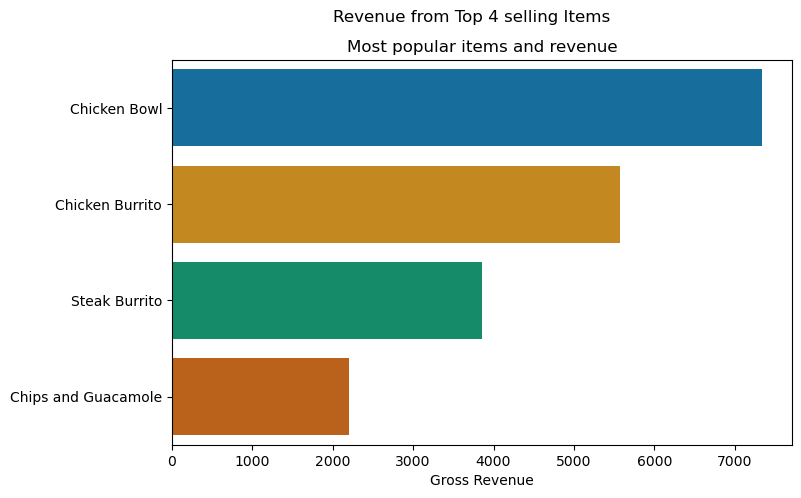

In [29]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

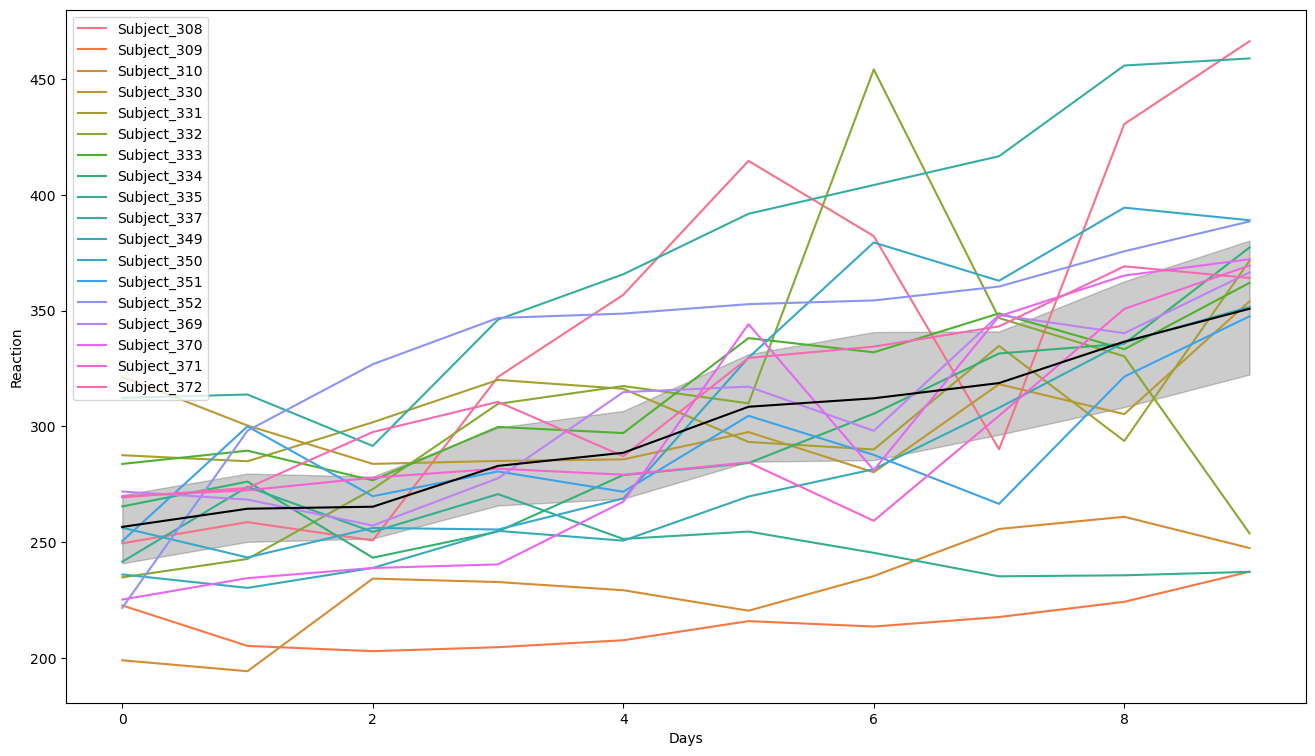

In [30]:
# 5.Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

sleepstudy = data('sleepstudy')
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')
plt.show()
